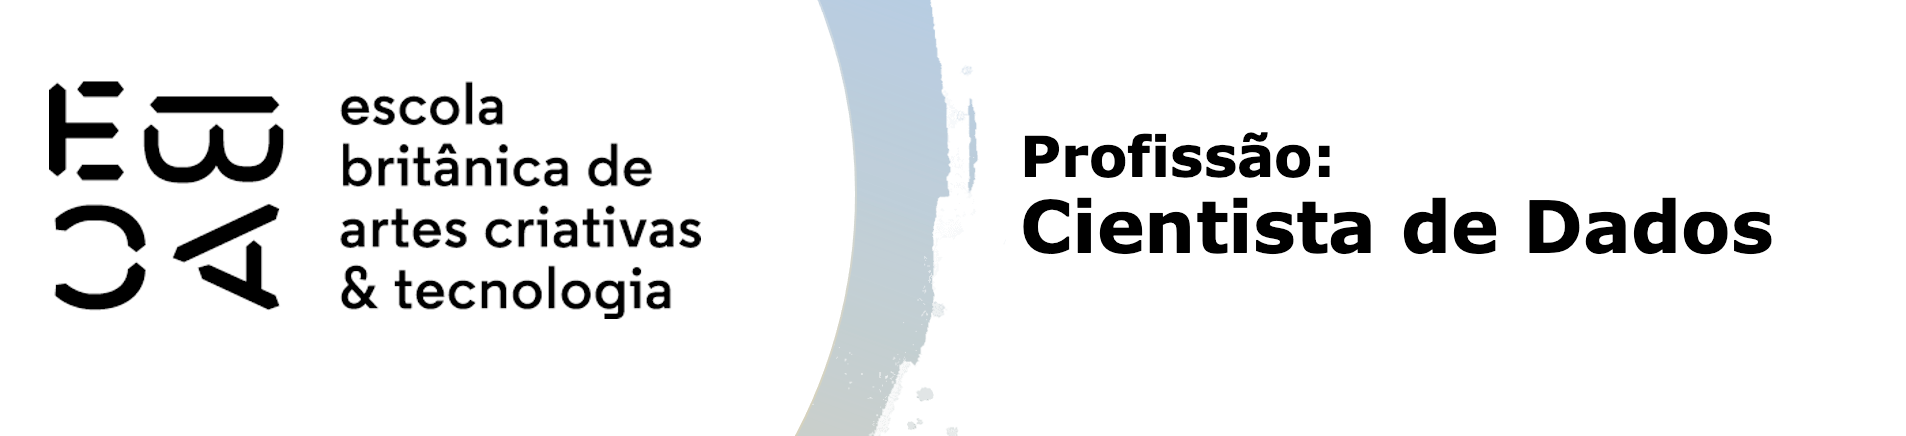

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [2]:
df.dtypes #verificando o tipo das variáveis. As datas já estão em formato datetime. 

CNPJ emit.                     object
Emitente                       object
No.                             int64
Data Emissão           datetime64[ns]
Valor NF                      float64
Data Registro          datetime64[ns]
Créditos                      float64
Situação do Crédito          category
Ano                             int64
Semestre                        int64
Retorno                       float64
flag_credito                    int64
categoria                      object
dtype: object

In [3]:
#Filtrando os dados pela data (a partir de 2020)
data_inicial = '2020-01-01'
df_2020 = df[df['Data Emissão'] >= data_inicial]

df_2020

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


In [4]:
df_2020.columns

Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria'],
      dtype='object')

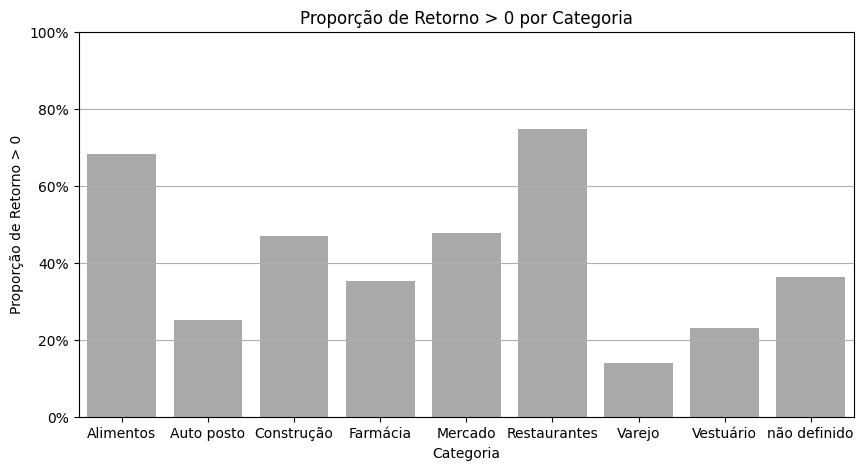

In [5]:
# Proporção de valores de Retorno > 0 para cada categoria
proporcoes = df_2020.groupby('categoria')['Retorno'].apply(lambda x: (x > 0).mean()).reset_index()
proporcoes.columns = ['categoria', 'proporcao']


plt.figure(figsize=(10,5))
sns.barplot(data=proporcoes, x='categoria', y='proporcao', color='darkgray')
plt.ylabel('Proporção de Retorno > 0')
plt.xlabel('Categoria')
plt.title('Proporção de Retorno > 0 por Categoria')
plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1 para representar porcentagens
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  # Formatar eixo y como porcentagem
plt.grid(axis='y')
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [7]:
# Criando a coluna de eventos: o evento são as entradas onde Retorno>0
df_2020.loc[:, 'evento'] = np.where(df_2020['Retorno'] > 0, 1, 0)

# Total de eventos e não-eventos geral (não é por categoria ainda)
total_eventos = df_2020['evento'].sum()
total_nao_eventos = df_2020['evento'].count() - total_eventos

In [8]:
# Agrupando por categoria e cálculo do WOE (por categoria)
woe_df = df_2020.groupby('categoria').agg(
    eventos=('evento', 'sum'),
    total=('evento', 'count')
).reset_index()

In [9]:
woe_df['nao_eventos'] = woe_df['total'] - woe_df['eventos']
woe_df['perc_eventos'] = woe_df['eventos'] / total_eventos
woe_df['perc_nao_eventos'] = woe_df['nao_eventos'] / total_nao_eventos

# WOE
woe_df['WOE'] = np.log(woe_df['perc_eventos'] / woe_df['perc_nao_eventos'])

woe_df

,categoria,eventos,total,nao_eventos,perc_eventos,perc_nao_eventos,WOE
0,Alimentos,3442,5050,1608,0.092234,0.032395,1.046342
1,Auto posto,135,540,405,0.003618,0.008159,-0.813331
2,Construção,7523,16047,8524,0.201592,0.171723,0.160360
3,Farmácia,3582,10189,6607,0.095986,0.133104,-0.326928
4,Mercado,13177,27558,14381,0.353100,0.289718,0.197846
5,Restaurantes,1626,2179,553,0.043571,0.011141,1.363801
6,Varejo,701,5066,4365,0.018785,0.087937,-1.543585
7,Vestuário,443,1920,1477,0.011871,0.029755,-0.918918
8,não definido,6689,18407,11718,0.179243,0.236069,-0.275381


In [10]:
print(woe_df[['categoria', 'WOE']])

      categoria       WOE
0     Alimentos  1.046342
1    Auto posto -0.813331
2    Construção  0.160360
3      Farmácia -0.326928
4       Mercado  0.197846
5  Restaurantes  1.363801
6        Varejo -1.543585
7     Vestuário -0.918918
8  não definido -0.275381


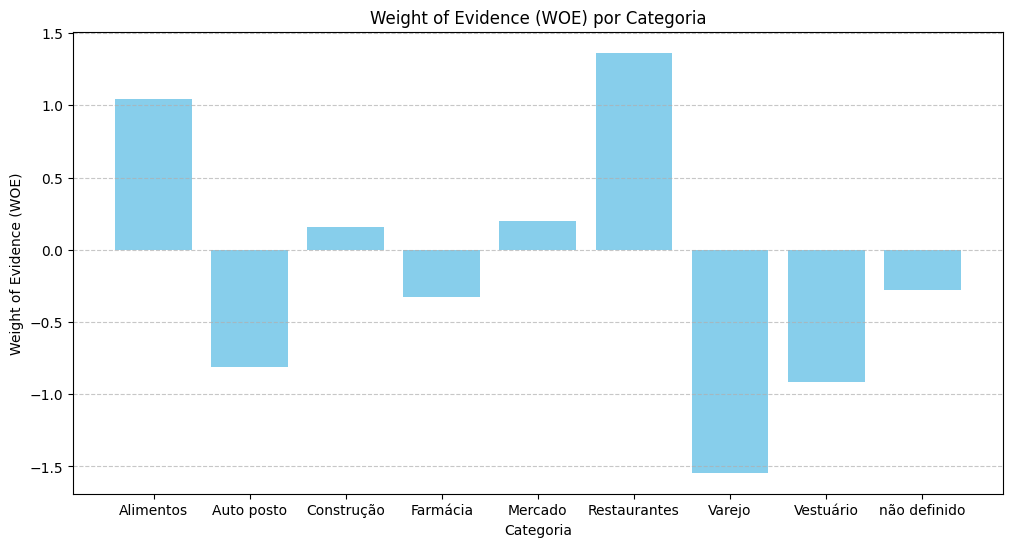

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(woe_df['categoria'], woe_df['WOE'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Weight of Evidence (WOE)')
plt.title('Weight of Evidence (WOE) por Categoria')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [14]:
woe_df['IV'] = (woe_df['perc_eventos'] - woe_df['perc_nao_eventos']) * woe_df['WOE']
iv = woe_df['IV'].sum()

print(f'Information Value (IV): {iv.round(3)}')

Information Value (IV): 0.279


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<p style="color: blue;">Pela análise do WOE realizada acima, podemos observar que os estabelecimentos da área alimentícia (restaurantes e alimentos) são os que têm maior chance de direcionar seus créditos à AMA. A análise de IV mostra um valor de 0.28, o que se interpreta como um poder preditivo médio da variável 'categoria' sobre o retorno dos créditos. </p>